<a href="https://colab.research.google.com/github/EXYNOS-999/corona_prophet/blob/master/corona_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Following notebook is an analysis of various features and thier effects in predicting nCOV Virus**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data=pd.read_csv("/content/2019_nCoV_data.csv")

In [0]:
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [0]:
grouped_country=data.groupby("Country")[['Last Update','Confirmed', 'Deaths', 'Recovered']]

Generalizing dataset for Chinese Subcontinet

In [0]:
china=data[(data['Country']=='China') |( data['Country']=='Mainland China')|( data['Country']=='Hong Kong')]

In [0]:
china

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
402,403,Guizhou,Chinese Sub,2020-01-30 21:30:00,15.0,0.0,1.0
403,404,Jilin,Chinese Sub,2020-01-30 21:30:00,14.0,0.0,1.0
404,405,Hong Kong,Chinese Sub,2020-01-30 21:30:00,12.0,0.0,0.0
406,407,Qinghai,Chinese Sub,2020-01-30 21:30:00,8.0,0.0,0.0


Unique countries with known cases

In [0]:
data['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy'], dtype=object)

In [0]:
china['Country'].replace('Mainland China','Chinese Sub',inplace=True)
china['Country'].replace('Hong Kong','Chinese Sub',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
Chinese=china.groupby('Last Update')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [0]:
Chinese

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,549.0,0.0,0.0
1,2020-01-23 12:00:00,641.0,18.0,30.0
2,2020-01-24 12:00:00,918.0,26.0,36.0
3,2020-01-25 12:00:00,828.0,4.0,6.0
4,2020-01-25 22:00:00,1156.0,52.0,43.0
5,2020-01-26 23:00:00,2745.0,80.0,51.0
6,2020-01-27 20:30:00,4417.0,107.0,60.0
7,2020-01-28 23:00:00,5978.0,132.0,104.0
8,2020-01-29 21:00:00,7688.0,170.0,127.0
9,2020-01-30 21:30:00,9670.0,213.0,179.0


In [0]:
x=Chinese[['Last Update','Deaths','Recovered']]

In [0]:
y=Chinese[['Confirmed']]

Chinese Currency Data -INR changes 

In [0]:
currency_china=pd.DataFrame([10.307,
10.318,
10.28,
10.27,10.27,
10.3,
10.282,
10.282,
10.282,
10.283])

In [0]:
currency_china.columns=['Currency']

In [0]:
f1=pd.concat([x,currency_china['Currency']],axis=1)

In [0]:
f1=f1.drop(columns=['Last Update'])

# Correlation between currency and deaths

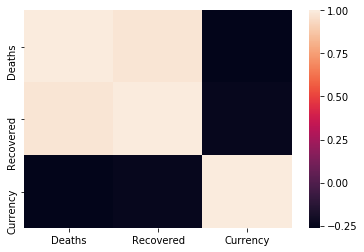

In [0]:
sns.heatmap(f1.corr())

In [0]:
from sklearn.svm import SVR
model=SVR(kernel='linear',C=0.25,tol=0.0035)
model.fit(f1.values,y.values)
predicted=model.predict(f1.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
predicted

array([ 135.56383489, 1193.98002267, 1539.80178439,  359.44172434,
       2451.35971355, 3440.87826696, 4416.90014115, 5926.56363951,
       7475.77649347, 9670.0990778 ])

Text(0, 0.5, 'Confirmed Cases')

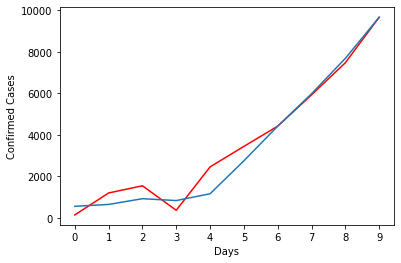

In [0]:
plt.plot(np.arange(10),predicted,c='red')
plt.plot(np.arange(10),y.values)
plt.xticks(np.arange(10))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

- Initial drop in currency  first indicator of virus
- As time progresses currency stabilizes itself

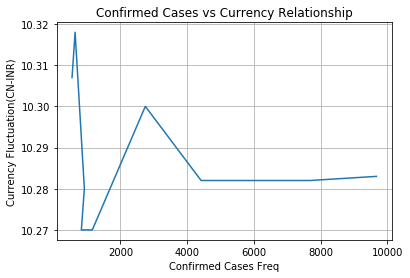

In [0]:
plt.plot(Chinese['Confirmed'],f1['Currency'])
plt.title("Confirmed Cases vs Currency Relationship")
plt.xlabel("Confirmed Cases Freq")
plt.ylabel('Currency Fluctuation(CN-INR)')
plt.grid(True)

 # Share Price drop
 An evident drop in share price of those operating in Wuhan



In [0]:
peuget_shares=pd.DataFrame([38.96,36.99,36.27,36.20,36.15,35.10,35.56,36.15,35.58,35.24])

In [0]:
f1=pd.concat([f1,peuget_shares],axis=1)

In [0]:
f1.columns=[ 'Deaths', 'Recovered','Currency','Shares(EUR)']

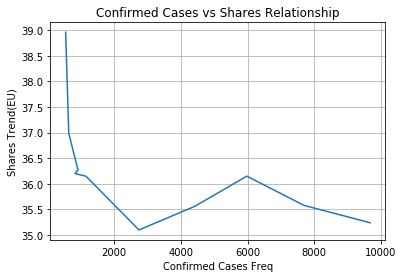

In [0]:
plt.plot(Chinese['Confirmed'],f1['Shares(EUR)'])
plt.title("Confirmed Cases vs Shares Relationship")
plt.xlabel("Confirmed Cases Freq")
plt.ylabel('Shares Trend(EU)')
plt.grid(True)

# Geological Features such as weather,etc

HighestTemp LowestTemp Humidity   LowHumidity
8             -2           91          93
7              4           92          80
8              4           92          87
7              6           90          87
6              4           90          81
4              2           82          75
5              2           84          57
8              2           90          58
12            -3           92          42
14            -2           70          37





In [0]:
weather=pd.read_csv('/content/ChinaWeather.csv')

In [0]:
f1=pd.concat([f1,weather],axis=1)

In [0]:
f1=f1.fillna(method='ffill')

In [0]:
f1

,Deaths,Recovered,Currency,Shares(EUR),HT,LT,HHUM,LHUM
0,0.0,0.0,10.307,38.96,8.0,-2.0,91.0,93.0
1,18.0,30.0,10.318,36.99,7.0,4.0,92.0,80.0
2,26.0,36.0,10.280,36.27,8.0,4.0,90.0,87.0
3,4.0,6.0,10.270,36.20,6.0,6.0,90.0,81.0
4,52.0,43.0,10.270,36.15,4.0,4.0,82.0,75.0
5,80.0,51.0,10.300,35.10,5.0,2.0,84.0,57.0
6,107.0,60.0,10.282,35.56,8.0,2.0,90.0,58.0
7,132.0,104.0,10.282,36.15,12.0,-3.0,92.0,42.0
8,170.0,127.0,10.282,35.58,14.0,-2.0,70.0,37.0
9,213.0,179.0,10.283,35.24,14.0,-2.0,70.0,37.0


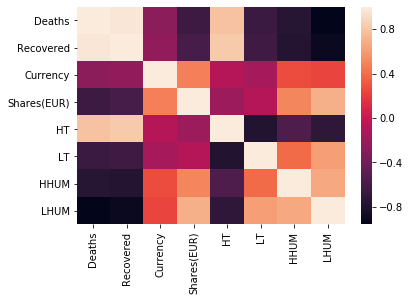

In [0]:
sns.heatmap(f1.corr())

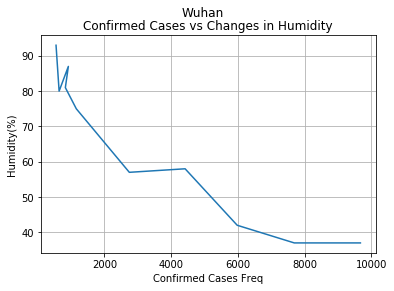

In [0]:
plt.plot(Chinese['Confirmed'],f1['LHUM'])
plt.title("Confirmed Cases vs Changes in Humidity")
plt.suptitle('Wuhan')
plt.xlabel("Confirmed Cases Freq")
plt.ylabel('Humidity(%)')
plt.grid(True)

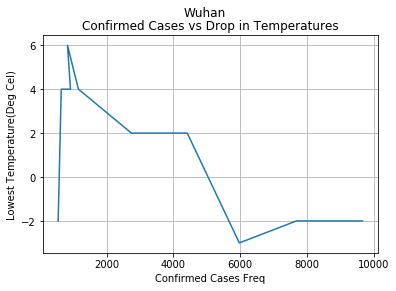

In [0]:
plt.plot(Chinese['Confirmed'],f1['LT'])
plt.title("Confirmed Cases vs Drop in Temperatures")
plt.suptitle('Wuhan')
plt.xlabel("Confirmed Cases Freq")
plt.ylabel('Lowest Temperature(Deg Cel)')
plt.grid(True)

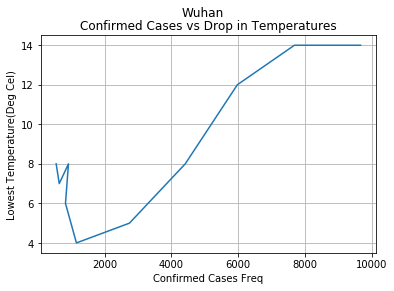

In [0]:
plt.plot(Chinese['Confirmed'],f1['HT'])
plt.title("Confirmed Cases vs Drop in Temperatures")
plt.suptitle('Wuhan')
plt.xlabel("Confirmed Cases Freq")
plt.ylabel('Lowest Temperature(Deg Cel)')
plt.grid(True)

# From the above anaylsis we can clerly conclude:
- Rapid changes in weather characterized by extremeties in Temperature, Humidity
  are possible factors which might favour pathogen production

# Now we analyse flights data over period of time

In [0]:
flights_china=pd.read_csv('/content/China_flights.csv')

In [0]:
flights_china=flights_china.drop(columns=['Day'])

In [0]:
filt_flight=flights_china[:10]

In [0]:
fli

In [0]:
f1=pd.concat([f1,filt_flight],axis=1)

In [0]:
f1

,Deaths,Recovered,Currency,Shares(EUR),HT,LT,HHUM,LHUM,Flights_toChina
0,0.0,0.0,10.307,38.96,8.0,-2.0,91.0,93.0,10.0
1,18.0,30.0,10.318,36.99,7.0,4.0,92.0,80.0,11.0
2,26.0,36.0,10.280,36.27,8.0,4.0,90.0,87.0,14.0
3,4.0,6.0,10.270,36.20,6.0,6.0,90.0,81.0,18.0
4,52.0,43.0,10.270,36.15,4.0,4.0,82.0,75.0,25.0
5,80.0,51.0,10.300,35.10,5.0,2.0,84.0,57.0,27.0
6,107.0,60.0,10.282,35.56,8.0,2.0,90.0,58.0,29.0
7,132.0,104.0,10.282,36.15,12.0,-3.0,92.0,42.0,35.0
8,170.0,127.0,10.282,35.58,14.0,-2.0,70.0,37.0,100.0
9,213.0,179.0,10.283,35.24,14.0,-2.0,70.0,37.0,92.0


- More travels to China could lead to more spread of the disease 

- As well as as proffesionals taking trips urgently for thier business trips,etc.

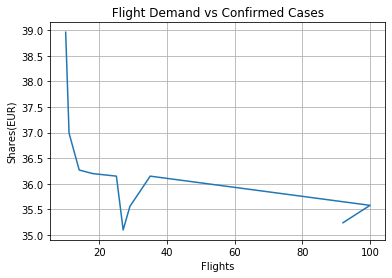

In [0]:
plt.plot(f1['Flights_toChina'],f1['Shares(EUR)'],)
plt.title(" Flight Demand vs Confirmed Cases ")
plt.ylabel("Shares(EUR)")
plt.xlabel('Flights')
plt.grid(True)

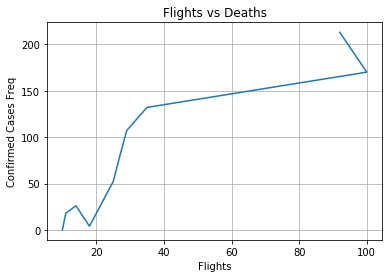

In [0]:
plt.plot(f1['Flights_toChina'],Chinese['Deaths'])
plt.title("Flights vs Deaths")
plt.ylabel("Confirmed Cases Freq")
plt.xlabel('Flights')
plt.grid(True)

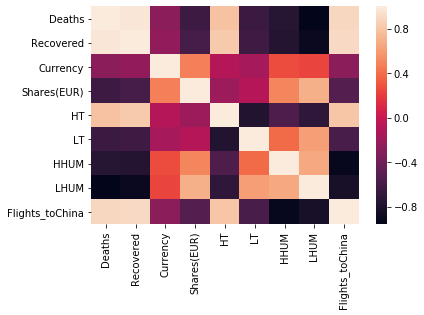

In [0]:
sns.heatmap(f1.corr())

In [0]:
data=pd.read_csv('/content/china.csv')

In [0]:
data.columns=['DROPPER','Provinces','Country','Last Update'	,'Confirmed'	,'Deaths'	,'Recovered']

In [0]:
data=data.drop(columns=['Last Update','DROPPER','Provinces','Country'])

In [0]:
data=data.fillna(method='ffill')

In [0]:
from sklearn.svm import SVR
model=SVR(kernel='linear')
model.fit(data[['Deaths','Recovered']].values,data['Confirmed'].values)
predicted=model.predict(data[['Deaths','Recovered']].values)

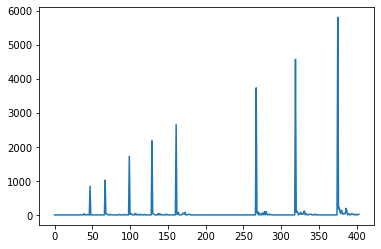

In [0]:
plt.plot(np.arange(len(data)),predicted)

# USA

In [0]:
usa=data[(data['Country']=='US')]
usa=usa.drop(columns=['Sno','Province/State','Country'])

In [0]:
currency_usa=[71.110,71.331,71.326,71.329,71.451,71,71.2,71.310,71.569,71.497]
currency_usa=pd.DataFrame(currency_usa)

In [0]:
usa=usa.groupby('Last Update')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [0]:
fUsa=pd.concat([usa,currency_usa],axis=1)

In [0]:
fUsa.columns=['Last Update','Confirmed','Deaths','Recovered','Currency']

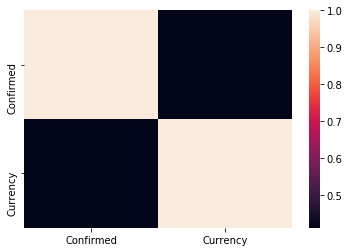

In [0]:
sns.heatmap(fUsa.drop(columns=['Deaths','Recovered']).corr())

We analyze apple shares and it's relationship.

- Apple being an American company .
- America is susceptible to nCOV disease.
- Apple like many others has factories operational ,which have been shutdown      causing delays in productions

In [0]:
apple_shares=pd.DataFrame([319.23,318.31,317.23,316.52,308.95,317.69,317.69,324.34,323.87,309.51])

In [0]:
fUsa

,Last Update,Confirmed,Deaths,Recovered,Currency
0,2020-01-22 12:00:00,1.0,0.0,0.0,71.110
1,2020-01-23 12:00:00,1.0,0.0,0.0,71.331
2,2020-01-24 12:00:00,2.0,0.0,0.0,71.326
3,2020-01-25 12:00:00,2.0,0.0,0.0,71.329
4,2020-01-26 23:00:00,5.0,0.0,0.0,71.451
5,2020-01-27 20:30:00,5.0,0.0,0.0,71.000
6,2020-01-28 18:00:00,1.0,0.0,0.0,71.200
7,2020-01-28 23:00:00,4.0,0.0,0.0,71.310
8,2020-01-29 21:00:00,5.0,0.0,0.0,71.569
9,2020-01-30 21:30:00,6.0,0.0,0.0,71.497


In [0]:
fUsa=pd.concat([fUsa,apple_shares],axis=1)


In [0]:
fUsa.columns=['Last Update','Confirmed','Deaths','Recovered','Currency'	,'SharePrice(USD)']

In [0]:
fUsa

,Last Update,Confirmed,Deaths,Recovered,Currency,SharePrice(USD)
0,2020-01-22 12:00:00,1.0,0.0,0.0,71.110,319.23
1,2020-01-23 12:00:00,1.0,0.0,0.0,71.331,318.31
2,2020-01-24 12:00:00,2.0,0.0,0.0,71.326,317.23
3,2020-01-25 12:00:00,2.0,0.0,0.0,71.329,316.52
4,2020-01-26 23:00:00,5.0,0.0,0.0,71.451,308.95
5,2020-01-27 20:30:00,5.0,0.0,0.0,71.000,317.69
6,2020-01-28 18:00:00,1.0,0.0,0.0,71.200,317.69
7,2020-01-28 23:00:00,4.0,0.0,0.0,71.310,324.34
8,2020-01-29 21:00:00,5.0,0.0,0.0,71.569,323.87
9,2020-01-30 21:30:00,6.0,0.0,0.0,71.497,309.51


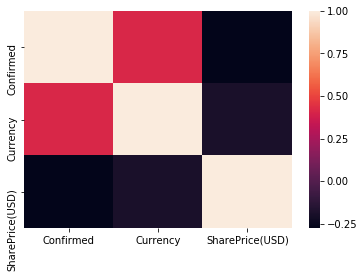

In [0]:
sns.heatmap(fUsa.drop(columns=['Deaths','Recovered']).corr())

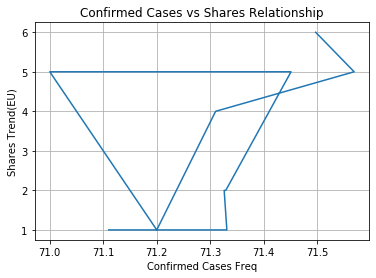

In [0]:
plt.plot(fUsa['Currency'],fUsa['Confirmed'])
plt.title("Confirmed Cases vs Shares Relationship")
plt.xlabel("Confirmed Cases Freq")
plt.ylabel('Shares Trend(EU)')
plt.grid(True)

Geographical Location plays a big role different geographical features are required

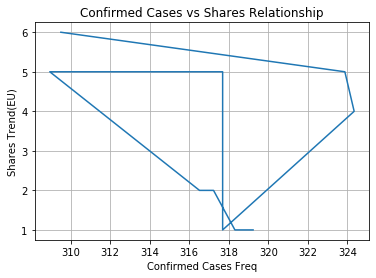

In [0]:
plt.plot(fUsa['SharePrice(USD)'],fUsa['Confirmed'])
plt.title("Confirmed Cases vs Shares Relationship")
plt.xlabel("Confirmed Cases Freq")
plt.ylabel('Shares Trend(EU)')
plt.grid(True)

In [0]:
fUsa.to_csv('/content/usa_formatted.csv')

In [0]:
usa

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-23 12:00:00,1.0,0.0,0.0
2,2020-01-24 12:00:00,2.0,0.0,0.0
3,2020-01-25 12:00:00,2.0,0.0,0.0
4,2020-01-26 23:00:00,5.0,0.0,0.0
5,2020-01-27 20:30:00,5.0,0.0,0.0
6,2020-01-28 18:00:00,1.0,0.0,0.0
7,2020-01-28 23:00:00,4.0,0.0,0.0
8,2020-01-29 21:00:00,5.0,0.0,0.0
9,2020-01-30 21:30:00,6.0,0.0,0.0


In [0]:
usa_flights=pd.read_csv('/content/usa_flights.csv')

In [0]:
fUsa=pd.concat([fUsa,usa_flights],axis=1)

In [0]:
fUsa=fUsa.drop(columns=['Deaths','Recovered'])

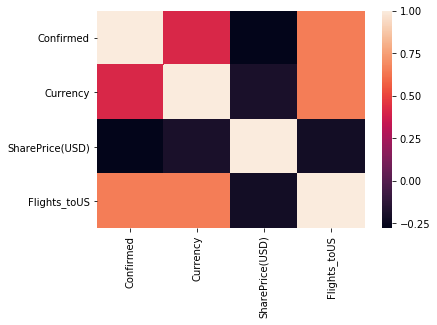

In [0]:
sns.heatmap(fUsa.corr())

In [0]:
fUsa

,Last Update,Confirmed,Currency,SharePrice(USD),Flights_toUS
0,2020-01-22 12:00:00,1.0,71.110,319.23,67
1,2020-01-23 12:00:00,1.0,71.331,318.31,71
2,2020-01-24 12:00:00,2.0,71.326,317.23,72
3,2020-01-25 12:00:00,2.0,71.329,316.52,84
4,2020-01-26 23:00:00,5.0,71.451,308.95,82
5,2020-01-27 20:30:00,5.0,71.000,317.69,76
6,2020-01-28 18:00:00,1.0,71.200,317.69,77
7,2020-01-28 23:00:00,4.0,71.310,324.34,77
8,2020-01-29 21:00:00,5.0,71.569,323.87,86
9,2020-01-30 21:30:00,6.0,71.497,309.51,83


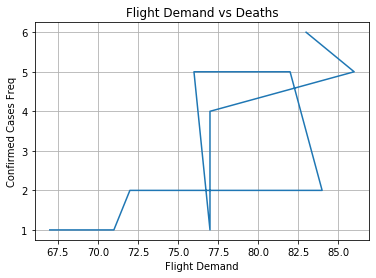

In [0]:
plt.plot(fUsa['Flights_toUS'],fUsa['Confirmed'])
plt.title("Flight Demand vs Deaths")
plt.ylabel("Confirmed Cases Freq")
plt.xlabel('Flight Demand')
plt.grid(True)